In [1]:
# import libraries 
import matplotlib.pyplot as plt 

1-D peak is the maxima in a line.
suppose there are n number of elements or 1D array

1D array = [n1, n2, n3,.........n-1, n] 


in this case n[i] can only be act as  peak if n[i] >= n[i-1] and n[i] >= n[i+1]


Let's find 1-D peak using linear search algorithm.


###### Note: here I am considering that there is only one peak present in the array 

Also, since in this notebook I will compare complexities. I would like to explain first what is log(n) complexity?
let's say there is a sorted list or 1d array.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

now i wanna put 10 in this array. How will I do that?

- first I will take the element at n/2 position which is 8 

=> 16 * (1 / 2)  = 8
- now i will compare it with 16. Since 16> 5 there is a posiblity that 16 will be in the right half positon, so, i am left with 

[ 8, 9, 10, 11, 12, 13, 14, 15]

- now take compare 13 again with middle number 

=> 8 * 1/2  = 4  

[12, 13, 14, 15 ] 

=> 4* 1/2  = 2

[14, 15]
=> 2 * 1/2   = 1

[15] 

since 9 < 16, put 16 after 9

now let's count the steps.
10* 1/2 * 1/2 * 1/2 * 1/2

10 * (1/2)^4 = 1 

n * (1/2)^k = 1

n / 2^k = 1 

2^k * (n/ 2^k) = 2^k

n = 2^k

Now log is A quantity representing the power to which a fixed number (the base) must be raised to produce a given number.

log2(n) = k



Now, let's find a peak

###   LINEAR SEARCH ALGORITHM





In [89]:
def get_one_d_peak(one_d_array):
    
    max_peak = one_d_array[0]
    tmp = one_d_array[0]
    size_of_array = len(one_d_array)

    for i in range(len(one_d_array)):
        
        """ 
        case 1:
        if element is present at first location then check only right side element 
        """
        if i == 0:
            if one_d_array[i] >= one_d_array[i+1]:
                return one_d_array[i]        
        """ 
        case 2:
        if element is present anywhere except first and last position 
        """
        if i > 0 and i < (size_of_array - 1):
            if one_d_array[i] >= one_d_array[i-1] and one_d_array[i] >= one_d_array[i+1] :
                    return one_d_array[i]        
        """
        case3:
        if element is present at the last position then check only left side element 
        """
        if i == size_of_array - 1:
            if one_d_array[i] >= one_d_array[i-1]:
                    return one_d_array[i]
            
    return max_peak

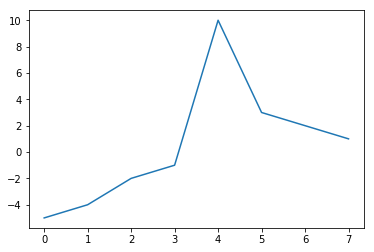

1.52 µs ± 35.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


10

In [3]:
one_d_array = [-5, -4, -2, -1 , 10, 3, 2, 1]
plt.plot(one_d_array)
plt.show()
%timeit get_one_d_peak(one_d_array)
get_one_d_peak(one_d_array)

4.73 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


19

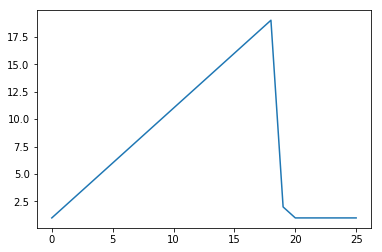

In [4]:
one_d_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,2,1,1,1,1,1,1]
plt.plot(one_d_array)
%timeit get_one_d_peak(one_d_array)
get_one_d_peak(one_d_array)

In [5]:
one_d_array = [1,2,14,45,35]
plt.show(one_d_array)
%timeit get_one_d_peak(one_d_array)
get_one_d_peak(one_d_array)

1.38 µs ± 51.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


45

since we are traversing every single element to get the peak, its time complexity is O(n).

Let's check other time complexities 

### Divide and Conqure Algorithm

To use this algorithm we need to sort the data first.

Let one_d_array is of size n.

    - then take the middle index number(one_d_array[n/2]) compare that number with the number or element present at n/2-1 abd n/2 + 1
    - if one_d_arrar[n/2] < one_d_array[n/2 + 1] then search for the right side elements 
    - else search for the left side element 
    - if both cases will not work then n/2th element is the peak
    - its complxity is O(log(n)) as we are taking n/2 steps at each iteration.
    
 
    


In [6]:
def perform_divide_and_conquer(one_d_array):
        # get new middle number 
        print('array:', one_d_array)
        middle_idx = int(len(one_d_array)/2)
        middle_num = one_d_array[middle_idx]
        print('middle number:', middle_num)
        
        if len(one_d_array) > 2:
            """ 
            case 1:
            if middle number is greater than or equal to left and right number then the middle number is a peak
            """
            if (middle_num >= one_d_array[middle_idx - 1 ]) and (middle_num >= one_d_array[middle_idx + 1]) :
                print('peak:', middle_num)
                return middle_num  
            

            """ 
            case 2:
            if middle number less than right number then search only in right half
            """
            if (middle_num >= one_d_array[middle_idx -1]) and (middle_num < one_d_array[middle_idx + 1]): 
                one_d_array = one_d_array[middle_idx: ]
                return perform_divide_and_conquer(one_d_array)

            """ 
            case 3:
            if middle number less than left number then search only in left half
            """
            if (middle_num < one_d_array[middle_idx -1]) and (middle_num >= one_d_array[middle_idx + 1]): 
                one_d_array = one_d_array[: middle_idx]
                return perform_divide_and_conquer(one_d_array)

        else: # if length of array is less than 2
            print('peak:', max(one_d_array))
            return max(one_d_array)
    
        
        

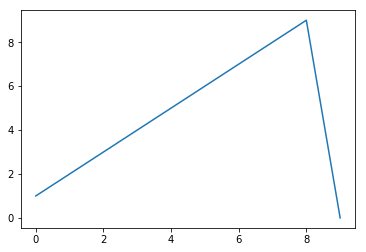

array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
middle number: 6
array: [6, 7, 8, 9, 0]
middle number: 8
array: [8, 9, 0]
middle number: 9
peak: 9


9

In [7]:
one_d_array = [1,2,3,4,5,6,7,8,9,0]
plt.plot(one_d_array)
plt.show()
perform_divide_and_conquer(one_d_array)

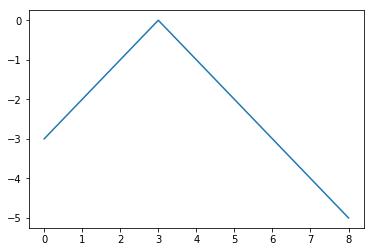

array: [-3, -2, -1, 0, -1, -2, -3, -4, -5]
middle number: -1
array: [-3, -2, -1, 0]
middle number: -1
array: [-1, 0]
middle number: 0
peak: 0


0

In [8]:
one_d_array = [-3,-2,-1,0,-1,-2,-3,-4,-5]
plt.plot(one_d_array)
plt.show()
perform_divide_and_conquer(one_d_array)

### Let's search 2d peak

By 2D peak I mean that number should be greater than its immediate top and down of that number and immediate left and right of that number 
- it should make a cone
for example:
consider a matrix - 

[[ 1, 3, 3],

[2, 4, 2],

[3, 2, 1] ]


in the above matrix 4 is the peak as it is greater than top-value(3), down-value(2), right-value(2), left-value(2)


#### Linear Search Algorithm

In [9]:
def linear_search_2d_peak(two_d_array):
    total_rows, total_cols = two_d_array.shape
    for row in range(total_rows):
        for col in range(total_cols):
            # case 1: if pointer is at (0,0) position.
            if row == 0 and col == 0:
                if ((two_d_array[row][col] >= two_d_array[row][col + 1])
                and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                    return two_d_array[row][col]
            # case 2: if pointer is at last position:
            if (row == total_rows - 1) and (col == total_cols - 1):
                if ((two_d_array[row][col] >= two_d_array[row][col - 1]) 
                and (two_d_array[row][col] >= two_d_array[row - 1][col])):
                    return two_d_array[row][col]
            # check in 2 directions
            if row == 0 and col == total_cols - 1 :
                if ((two_d_array[row][col] >= two_d_array[row][col - 1]) 
                and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                    return two_d_array[row][col]
            if row == total_rows - 1 and col == 0:
                if ((two_d_array[row][col] >= two_d_array[row][col + 1])
                and (two_d_array[row][col] >= two_d_array[row - 1][col])):
                    return two_d_array[row][col]
                
           
            # case 3: check in 3 directions 
            if row == 0 and col != 0 and col != total_cols - 1:
                if ((two_d_array[row][col] >= two_d_array[row][col - 1]) 
                and (two_d_array[row][col] >= two_d_array[row][col + 1])
                and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                    return two_d_array[row][col]
            if row == total_rows - 1 and col != total_cols - 1 and col != 0:
                if ((two_d_array[row][col] >= two_d_array[row][col - 1]) 
                and (two_d_array[row][col] >= two_d_array[row][col + 1])
                and (two_d_array[row][col] >= two_d_array[row - 1][col])):
                    return two_d_array[row][col]
            if col == 0 and row != 0 and row != total_rows - 1:
                if ((two_d_array[row][col] >= two_d_array[row][col + 1])
                and (two_d_array[row][col] >= two_d_array[row -1 ][col])
                and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                    return two_d_array[row][col]
            if col == total_cols - 1 and row != total_rows - 1 and row != 0:
                if ((two_d_array[row][col] >= two_d_array[row][col - 1])
                and (two_d_array[row][col] >= two_d_array[row -1][col])
                and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                    return two_d_array[row][col]
                
            
            # case 4: check in 4 directions
            if ((two_d_array[row][col] >= two_d_array[row][col-1]) 
            and (two_d_array[row][col] >= two_d_array[row][col + 1]) 
            and (two_d_array[row][col] >= two_d_array[row - 1][col])
            and (two_d_array[row][col] >= two_d_array[row + 1][col])):
                return two_d_array[row][col]

                    
                
                
                    

In [10]:
import numpy as np
import matplotlib.pyplot as plt


lst = [[1,1, 0,], [2,3,1], [1,0,-1]]
two_d_array = np.array(lst)
two_d_array

array([[ 1,  1,  0],
       [ 2,  3,  1],
       [ 1,  0, -1]])

In [11]:
linear_search_2d_peak(two_d_array)

3

as you can see this is the worse approach one can try !

- it is traversing every single element and comparing with other values.
- its complexity is O(nm) and if n = m then it is n^2
- let's try some other approch called "Greedy Ascent Algorithm"

#### Greedy Ascent Algorithm
- it choose some element let's say first element then it compares it with other adjacent elements and move in the direction in which element value is higher than that element.
- if no element is higher than that element then it will gives that element as a peak
- we are traversing every element to get the peak and in worse case this algorithm may traverse every single element. Therefore, its complexity is O(nm).
- But it is somewhat better approach as compare to linear approach.

In [59]:
""" 
function to check the row and column is falling on the matrix or inside the matrix
"""
def validate_row_col(row, col, total_rows, total_cols):
    if (row < 0 ) or (row > (total_rows - 1)):
        return False
    elif (col < 0) or (col > (total_cols - 1)):
        return False
    else:
        return True

"""
greedy ascent algorithm in which element compare itself from neighbouring elements and move in the direction of the element
which is greater than that element, if at certain point it finds a element which is greater than all of its neighbour then it 
will return that element.

"""
def greedy_ascent_algo(two_d_array, row=0, col=0):
    max_num = two_d_array[row][col]
    total_rows, total_cols = two_d_array.shape
    # if element is at corner (0, 0) 
    # check right
    if validate_row_col(row, col + 1, total_cols=total_cols, total_rows=total_rows):
        if max_num < two_d_array[row][col + 1]:
            max_num = two_d_array[row][col + 1]
            row = row
            col = col + 1
            return greedy_ascent_algo(two_d_array, row, col)
   
        
    # check left
    if validate_row_col(row=row, col=col-1, total_rows=total_rows, total_cols=total_cols):
        
        if max_num < two_d_array[row][col - 1]:
            max_num = two_d_array[row][col - 1]
            row = row
            col = col - 1
            return greedy_ascent_algo(two_d_array, row, col)

    # check below
    if validate_row_col(row= row + 1, col=col, total_cols=total_cols, total_rows=total_rows):
        if max_num < two_d_array[row + 1][col]:
            max_num = two_d_array[row + 1][col]
            row = row + 1
            col = col
            return greedy_ascent_algo(two_d_array, row, col)
    
    # check top
    if validate_row_col(row= row - 1, col=col, total_cols=total_cols, total_rows=total_rows):
        if max_num < two_d_array[row - 1][col]:
            max_num = two_d_array[row - 1][col]
            row = row - 1
            col = col
            return greedy_ascent_algo(two_d_array, row, col)
        
    # if the element is not less than its neighbour elements than it is the peak
    return max_num 

 

In [60]:
two_d_array

array([[ 1,  1,  0],
       [ 5,  3,  1],
       [ 6,  7, 20]])

In [61]:
greedy_ascent_algo(two_d_array=two_d_array)

20

In [62]:
two_d_array = np.array([[1,2,1],[0, 1, 0], [0 , 0 , 0]])
two_d_array

array([[1, 2, 1],
       [0, 1, 0],
       [0, 0, 0]])

In [63]:
greedy_ascent_algo(two_d_array)

2

### Divide And Conqure Algorithm

again we will choose a middle element and take the global maxima of that row then we will compare it with it's neighbours now if any of the neighbour is greater than the current element then we will take global maxima of that row repeat the procedure.

for example : consider a matrix 
      
       [ 1,  1,  0]
       [ 5,  3,  1]
       [ 6,  7, 20]

- step 1: take the middle element which is 3
- then take global maxima of that row which is 5
- then compare 5 with its adjacent neighbours and move in the direction of the value which is greater than that which is 6 
- now take the global maxima of that row (20) and compare it with its adjacent neghbours [7, 1]
- 20 > 7 and 1 therefore it is 2d peak
- since we are taking n/2 steps in finding peak and m steps in finding global maxima of the row, its complexity is 
  O(mlog(n))

       


In [84]:
def divide_and_conqure_2d(two_d_array, row=0, col=0, count=0):
    total_rows, total_cols = two_d_array.shape
    
    #first step is to get middle value
    if count == 0:
        middle_row = int (total_rows / 2)
        middle_col = int(total_cols / 2)
        
    # on other steps update variables with the new values of row and col
    else: 
        middle_row = row
        middle_col = col
            
    # take global maxima of middle row
    max_val = two_d_array[middle_row][middle_col]
    col = middle_col
    row = middle_row
    for i in range(len(two_d_array[middle_row, :])):
        if max_val < two_d_array[middle_row, i]:
            max_val = two_d_array[middle_row, i]
            col = i 
            row = middle_row
    
    # now compare this global maxima value of row with its adjacent neighbours
    # check above
    if validate_row_col(row=row - 1, col=col, total_cols=total_cols, total_rows=total_rows):
        if max_val < two_d_array[row- 1][col]:
            max_val = two_d_array[row - 1][col]
            count +=1
            row = row -1
            col = col
            return divide_and_conqure_2d(two_d_array, count=count, row=row, col=col)
    # check below
    if validate_row_col(row=row + 1, col=col, total_cols=total_cols, total_rows=total_rows):
        if max_val < two_d_array[row + 1][col]:
            max_val = two_d_array[row + 1][col]
            count +=1
            row = row + 1
            col = col
            return divide_and_conqure_2d(two_d_array, count=count, row=row, col=col)
    
    # if the element is not smaller than its adjacent elements then it is a 2d peak.
    return max_val
    

In [85]:
two_d_array = np.array([[ 1,  1,  0],
   [ 5,  3,  1],
   [ 6,  7, 20]])
two_d_array

array([[ 1,  1,  0],
       [ 5,  3,  1],
       [ 6,  7, 20]])

In [86]:
divide_and_conqure_2d(two_d_array)

20

In [87]:
two_d_array = np.array([[1,2,1],[0, 1, 0], [0 , 0 , 0]])
two_d_array

array([[1, 2, 1],
       [0, 1, 0],
       [0, 0, 0]])

In [88]:
divide_and_conqure_2d(two_d_array)

2